# 1. Three Way Merge Sort

In [1]:
def mergesort3(arr,comps = 0):
    # base case: if array is only 1 item, return array
    comps += 1
    if len(arr) <= 1:
        return(arr,comps)
    
    # recursive case: divide and conquer
    else:
        
        # divide: split the problem into thirds and sort
        comps += 1
        d = -(-len(arr)//3) # the double negative is to round up
        comps += 1
        left,comps_l = mergesort3(arr[:d],comps)
        comps += 1
        mid,comps_m = mergesort3(arr[d:2*d],comps)
        comps += 1
        right,comps_r = mergesort3(arr[2*d:],comps)
        
        comps += 1
        left.append(float("inf"))
        comps += 1
        mid.append(float("inf"))
        comps += 1
        right.append(float("inf"))
        
        comps = comps + comps_l + comps_m + comps_r
        
        # conquer: merge the three sorted arrays into one
        
        # indexes for the smallest unconquered values
        comps += 1
        i = 0 # index for left
        comps += 1
        j = 0 # index for mid
        comps += 1
        k = 0 # index for right
        
        comps += 1
        ret_arr = [] # initialize array to be returned
        
        # while there are still items in any of the arrays:
        while left[i] != float("inf") or mid[j] != float("inf") or right[k] != float("inf"):
            comps += 1
            if left[i] <= mid[j]:
                comps += 1
                if left[i] <= right[k]:
                    # if left less than mid and right, add left
                    comps += 1
                    ret_arr.append(left[i])
                    comps += 1
                    i += 1
                else:
                    # if left less than mid and more than right, add right
                    comps += 1
                    ret_arr.append(right[k])
                    comps += 1
                    k += 1
            elif mid[j] <= right[k]:
                comps += 1
                # if mid less than left and right, add mid
                ret_arr.append(mid[j])
                comps += 1
                j += 1
            else:
                comps += 1
                # if mid less than left and more than right, add right
                ret_arr.append(right[k])
                comps += 1
                k += 1
        return(ret_arr,comps)
    

In [2]:
# testing
assert mergesort3([3,2,1])[0] == [1,2,3]
assert mergesort3([])[0] == []
assert mergesort3([1])[0] == [1]
assert mergesort3([2,1])[0] == [1,2]
assert mergesort3([2,1,2,2,2,2,2,2,2])[0] == [1,2,2,2,2,2,2,2,2]
assert mergesort3([99,-100,2,-8])[0] == [-100,-8,2,99]
print('all passed :)')

all passed :)


# 2. Merge sort that calls insertion sort when sublist < c.

### First, define insertion sort

In [3]:
def insertionSort(arr,comps = 0):
    # base case: if only 1 item in arr, return arr
    comps += 1
    if len(arr) <= 1:
        return(arr,comps)
    
    else:
        # divide: sort array except for last item
        comps += 1
        sub_sorted,comps_s = insertionSort(arr[:-1])
        comps += comps_s
        
        # conquer: insert last item into corrent position in sorted subarry
        for i in range(len(sub_sorted)-1,-2,-1):
            
            comps += 1
            # if subarray exhausted or item more than item at current index
            if i == -1 or arr[-1] >= sub_sorted[i]:
                # insert after this smaller/ nonexistent item
                comps += 1
                sub_sorted.insert(i+1,arr[-1])
                return(sub_sorted,comps)

In [4]:
# testing
assert insertionSort([3,2,1])[0] == [1,2,3]
assert insertionSort([])[0] == []
assert insertionSort([1])[0] == [1]
assert insertionSort([2,1])[0] == [1,2]
assert insertionSort([2,1,2,2,2,2,2,2,2])[0] == [1,2,2,2,2,2,2,2,2]
assert insertionSort([99,-100,2,-8])[0] == [-100,-8,2,99]
print('all passed :)')

all passed :)


### Define Mergesort

In [5]:
def mergesort(arr,comps=0):
    x = len(arr)
    # base casase len arr == 1
    if x <= 1:
        return(arr,comps)
    else:
        ret_arr = []
        
        # recursively sort left and right halves
        l_arr,comp_l = mergesort(arr[:int(x/2)],comps)
        r_arr,comp_r = mergesort(arr[int(x/2):],comps)

        comps = comps + comp_l + comp_r
        l_i = 0
        r_i = 0
        
        # while there are items in both, compare and append smaller
        while (l_i < len(l_arr)) and (r_i < len(r_arr)):
            comps += 1
            if l_arr[l_i] < r_arr[r_i]:
                ret_arr.append(l_arr[l_i])
                l_i += 1
            else:
                ret_arr.append(r_arr[r_i])
                r_i += 1
                
        # if anything remaining, append
        while l_i < len(l_arr):
            ret_arr.append(l_arr[l_i])
            l_i += 1
            
        while r_i < len(r_arr):
            ret_arr.append(r_arr[r_i])
            r_i += 1
        return(ret_arr,comps)

In [6]:
# testing
assert mergesort([3,2,1])[0] == [1,2,3]
assert mergesort([])[0] == []
assert mergesort([1])[0] == [1]
assert mergesort([2,1])[0] == [1,2]
assert mergesort([2,1,2,2,2,2,2,2,2])[0] == [1,2,2,2,2,2,2,2,2]
assert mergesort([99,-100,2,-8])[0] == [-100,-8,2,99]
print('all passed :)')

all passed :)


### Find for what length n insertion sort is faster

In [7]:
import random
import time
import matplotlib.pyplot as plt

def getTime(func, reps, *args):
    start = time.time()
    for i in range(reps):
        func(*args)
    end = time.time()
    return((end-start)/reps)

def randList(num,min,max):
    list = []
    for num in range(num+1):
        list.append(int(random.randint(min,max)))
    return(list)

# number of lists to test
n = 100
step_size = 1

# create test lists
testL = []
for i in range(1,n,step_size):
    testL.append(randList(i,-100,100))

merge_time = []
ins_time = []
merge_steps = []
ins_steps = []
    
for test_list in testL:
    
    # get times
    merge_time.append(getTime(mergesort,15,test_list))
    ins_time.append(getTime(insertionSort,15,test_list))
    
    # get steps
    merge_steps.append(mergesort(test_list)[1])
    ins_steps.append(insertionSort(test_list)[1])
    
# get time for sorting each list
x = range(1,n,step_size)

plt.plot(x,merge_time,color="green",label="merge")
plt.plot(x,ins_time,color="red",label="insertion")
plt.title('Pratical Time Complexity: Averaged Time')
plt.legend()
plt.show()

#plt.plot(x,y,color="black",label="theoretical",linestyle='--')
plt.plot(x,merge_steps,color="green",label="merge")
plt.plot(x,ins_steps,color="red",label="insertion")
plt.title('Theoretical Runtime: Steps where each line is a step')
plt.legend()
plt.show()

print('Practically, it looks like the crossover point is around 70.')
print('Theoretically it is hard to see a crossover point at all.')
print('But that can vary strongly based on how a step is defined')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Practically, it looks like the crossover point is around 70.
Theoretically it is hard to see a crossover point at all.
But that can vary strongly based on how a step is defined


### Following practical runtime, define augmented merge sort that switched to insertion sort when n <= 70

In [8]:
# adapted merge

def mergewithIns(arr, comps = 0):
    # base case: if array is only 1 item, return array
    if len(arr) <= 1:
        return(arr, comps)
    
    # condition case: switch to insertion sort
    if len(arr) <= 70:
        return(insertionSort(arr, comps))
    
    # merge case: divide and conquer
    else:
        
        # divide: split the problem into thirds and sort
        d = -(-len(arr)//3) # the double negative is to round up
        left, comps_l = mergewithIns(arr[:d])
        mid, comps_m = mergewithIns(arr[d:2*d])
        right, comps_r = mergewithIns(arr[2*d:])
        
        comps = comps + comps_l + comps_m + comps_r
        
        left.append(float("inf"))
        mid.append(float("inf"))
        right.append(float("inf"))
        
        # conquer: merge the three sorted arrays into one
        
        # indexes for the smallest unconquered values
        i = 0 # index for left
        j = 0 # index for mid
        k = 0 # index for right
        
        ret_arr = [] # initialize array to be returned
        
        # while there are still items in any of the arrays:
        while left[i] != float("inf") or mid[j] != float("inf") or right[k] != float("inf"):
            comps += 1
            if left[i] <= mid[j]:
                comps += 1
                if left[i] <= right[k]:
                    # if left less than mid and right, add left
                    ret_arr.append(left[i])
                    i += 1
                else:
                    # if left less than mid and more than right, add right
                    ret_arr.append(right[k])
                    k += 1
            elif mid[j] <= right[k]:
                comps += 1 
                # if mid less than left and right, add mid
                ret_arr.append(mid[j])
                j += 1
            else:
                comps += 1 
                # if mid less than left and more than right, add right
                ret_arr.append(right[k])
                k += 1
        return(ret_arr, comps)

In [9]:
# testing

assert mergewithIns([3,2,1])[0] == [1,2,3]
assert mergewithIns([])[0] == []
assert mergewithIns([1])[0] == [1]
assert mergewithIns([2,1])[0] == [1,2]
assert mergewithIns([2,1,2,2,2,2,2,2,2])[0] == [1,2,2,2,2,2,2,2,2]
assert mergewithIns([99,-100,2,-8])[0] == [-100,-8,2,99]
print('all passed :)')

all passed :)


### Justification for the treshhold of <= 43:
This is the maximum treshhold for when insertion sort is faster than merge sort. For all problem sizes 43 or less, insertion sort is faster. For all problem sizes more than 43, merge sort is faster.

Thus, by using a treshold of <= 43, we will always use the fastest possible sort for that sublist based on the length of the sublist. 

# 3. Analyze and compare the practical run times of regular, three way, and augmented merge sort.

In [10]:
# number of lists to test
n = 10000
step_size = 1000

# create test lists
testL = []
for i in range(1,n,step_size):
    testL.append(randList(i,-100,100))

merge_steps = []
merge_time = []
merge3_steps = []
merge3_time = []
mergeAug_steps = []
mergeAug_time = []
    
for test_list in testL:
    
    # get times
    merge_time.append(getTime(mergesort,15,test_list))
    merge3_time.append(getTime(mergesort3,15,test_list))
    mergeAug_time.append(getTime(mergewithIns,15,test_list))
    
    merge_steps.append(mergesort(test_list))
    merge3_steps.append(mergesort3(test_list))
    mergeAug_steps.append(mergewithIns(test_list))
# get time for sorting each list

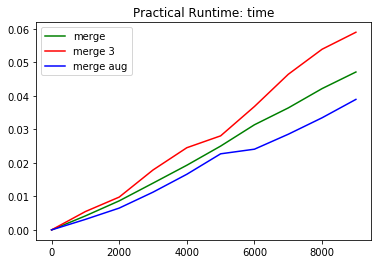

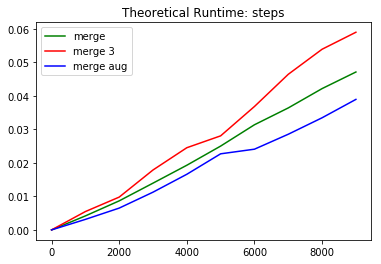

In [11]:
import matplotlib.pyplot as plt
# plot the time and steps for each sort

x = range(1,n,step_size)

plt.plot(x,merge_time,color="green",label="merge")
plt.plot(x,merge3_time,color="red",label="merge 3")
plt.plot(x,mergeAug_time,color="blue",label="merge aug")
plt.title('Practical Runtime: time')
plt.legend()
plt.show()

plt.plot(x,merge_time,color="green",label="merge")
plt.plot(x,merge3_time,color="red",label="merge 3")
plt.plot(x,mergeAug_time,color="blue",label="merge aug")
plt.title('Theoretical Runtime: steps')
plt.legend()
plt.show()


In [12]:
def mergeK(arr,k):
    if k <= 0:
        return('I don\'t understand that k :(')
    # base case: if array is only 1 item, return array
    if len(arr) <= 1:
        return(arr)
    
    # recursive case: divide and conquer
    else:
        
        # divide: split the problem into ks
        d = -(-len(arr)//k)
        sub_arrs = [[] for i in range(k)] # list of sub arrays
        
        j = 0
        for i in range(k):
            if ((j+1)*d) > len(arr):
                break
            sub_arrs[i] = arr[j*d:(j+1)*d]
            j+= 1

        # divide: sort each subarray:
        for i in range(len(sub_arrs)):
            sub_arrs[i] = mergeK(sub_arrs[i],k)
            
        # conquer: merge the three sorted arrays into one
        
        # create index for each subarray
        sub_index = []
        for i in sub_arrs:
            sub_index.append(0)
            
        # prepare return array
        ret_arr = []
        
        for i in sub_arrs:
            i.append(float('inf'))
        
        iter = True
        
        while iter:
            # check each subarray, except last
            iter = False
            updated = False
            for i in range(len(sub_arrs)-1):
                min = True
                for j in range(i+1, len(sub_arrs),1):
                    # if any of theother items are more than this one, this one is not the min
                    if sub_arrs[i][sub_index[i]] > sub_arrs[j][sub_index[j]]:
                        min = False
                        break
                # if none of the others are smaller, this is min
                if min == True:
                    # Append and update indexes
                    ret_arr.append(sub_arrs[i][sub_index[i]])
                    sub_index[i] += 1
                    updated = True
                    break
            # if none of the above are min, last must be min. 
            if updated == False:
                # Append and update indexes
                ret_arr.append(sub_arrs[len(sub_arrs)-1][sub_index[len(sub_arrs)-1]])
                sub_index[len(sub_arrs)-1] += 1
                iter = False
            # if there are still unexhausted arrays, repeat
            for i in range(len(sub_arrs)):
                if sub_arrs[i][sub_index[i]] != float('inf'):
                    iter = True
                    break
        return(ret_arr)

In [13]:
# testing
assert mergeK([2,3,1,-99,100,348],5) == [-99, 1, 2, 3, 100, 348]
assert mergeK([2,3,1,-99,100,348,999,2,4,1,8,2,1],5) == [-99, 1, 1, 2, 2, 2, 3, 4, 8, 100, 348, 999]
assert mergeK([],3) == []
assert mergeK([2,3,1,-99,100,348,999,2,4,1,8,2,1],4) == [-99, 1, 1, 2, 2, 2, 3, 4, 8, 100, 348, 999]
assert mergeK([2,3,1,-99,100,348],0) == "I don't understand that k :("

print('all passed :)')

all passed :)


In [14]:
# number of lists to test
n = 10000
step_size = 1000

# create test lists
testL = []
for i in range(1,n,step_size):
    testL.append(randList(i,-100,100))

merge2_time = []
merge3_time = []
merge5_time = []
merge10_time = []

for test_list in testL:
    # get times
    merge2_time.append(getTime(mergeK,15,test_list,2))
    merge3_time.append(getTime(mergesort,15,test_list,3))
    merge5_time.append(getTime(mergesort,15,test_list,5))
    merge10_time.append(getTime(mergewithIns,15,test_list,10))
    


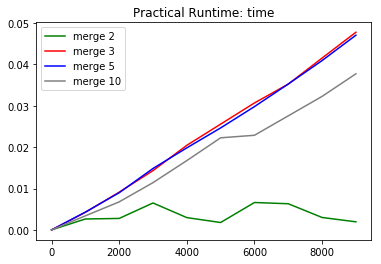

the best practical performance is when k = 2.
This is likely due to my own clumsy implementation that produces a significant ammount of overhead lines to make it work for any number k.
It may also be due to the time cost of creating so many different arrays then combining them.
Particularly, the number of comparisons that is necessary during the conquer step increases greatly with an increase in k.
Thus, I am unsure if there is an implementation in which the ideal k is more than 2.


In [15]:
x = range(1,n,step_size)

plt.plot(x,merge2_time,color="green",label="merge 2")
plt.plot(x,merge3_time,color="red",label="merge 3")
plt.plot(x,merge5_time,color="blue",label="merge 5")
plt.plot(x,merge10_time,color="grey",label="merge 10")
plt.title('Practical Runtime: time')
plt.legend()
plt.show()

print('the best practical performance is when k = 2.')
print('This is likely due to my own clumsy implementation that produces a significant ammount of overhead lines to make it work for any number k.')
print('It may also be due to the time cost of creating so many different arrays then combining them.')
print('Particularly, the number of comparisons that is necessary during the conquer step increases greatly with an increase in k.')
print('Thus, I am unsure if there is an implementation in which the ideal k is more than 2.')

### 1. Complexity:        
#### Merge Sort
Recursion Relation: 2T(n/2) + n      
Thus recursion tree looks like:     
    [n]       
    / \      
[n/2] [n/2]      
...     
    
Since the problem is split in half each time we recurse ($2T(n/2)$), it will take $lg_2(n)$ steps before we hit the base case of $n <= 1$.       
This means the recursion tree will have $lg_2(n)$ levels.       
Since the conquer step will take n steps ($n$), we then have to do n steps for each level.         
Thus the total number of steps that this sort will take will be the $numberOfLevels * stepsPerLevel$, which will be $lg_2(n)*n$, which will be $nlg_2n$.         
Additionally, since all of this remains True no matter the configuration of the list (even if the array started out sorted), the complexity of merge sort will be $\Theta(nlg_2n)$.    
#### Three-way Merge Sort
Recursion Relation: 3T(n/3) + n      
Thus recursion tree looks like:     
 [n]       
 / | \       
[n/3][n/3][n/3]      
...    
     
Since the problem is split in thirds each time we recurse ($3T(n/3)$), it will take $lg_3(n)$ steps before we hit the base case of $n <= 1$.       
This means the recursion tree will have $lg_3(n)$ levels.       
Since the conquer step will take n steps ($n$), we then have to do n steps for each level.         
Thus the total number of steps that this sort will take will be the $numberOfLevels * stepsPerLevel$, which will be $lg_3(n)*n$, which will be $nlg_3n$.         
Additionally, since all of this remains True no matter the configuration of the list (even if the array started out sorted), the complexity of merge sort will be $\Theta(nlg_3n)$.     
#### Augmented Merge Sort
Recursion Relation: 3T(n/3) + n      
Thus recursion tree looks like:     
T(n) = {8n^2             if n <= 43,
        2T(n/2) + n      if n > 43}     
Since this algorithm has a condition case, at n <= 43, it will have a runtime complexity of $O(n^2)$ (since n^2 is the highest polynomial) and $\Omega(n)$ (since if the array is already sorted, the algorithm will only perform one check for each item in the array since they will already be in their optimal position).     

If n > 43, it will have the same runtime complexity as merge sort which will be $\Theta(nlg_2n)$

### 2. Assumptions in assessing runtime
Practical
    - My computer processor processes each single step at an even/ consistent amount of time, or at least with a variation that can be negated my averaging over 3.
    - The inputs will be lists of random numbers, with no particular structure/ pattern otherwise.
    - the length of the inputs will be regularly distributed between 0 and 1000.
    - The inputs will be of lists of integeres between -100 to 100     
Theoretical

    - Computational steps (addition, insertion, variable declaration, etc) all take the same ammount of time.    

### 3. Actual vs Theoretical Results
while in theory, 3 way merge sort should perform better than 2 way, they perform virtually the same. In contrast, augmented merge sort seems to perform consistently better than merge sort.

# HCs

#algorithms: I accurately implemented multiple algotithms with clear comments to explain each step.

#optimization: I always tried to make the algorithm implementations as time efficient as possible. Additionally, I analyzed the time complexity for the algotihms and gave an in depth explanation of how I came to that conclusion. 

#dataviz: I constructed simple but effective data visualizations of time complexity, and used them to analyze practical time performance of different algotihms over increasing problem sizes

#professionalism: I clearly marked different sections of this assignment with markdown headings, commented my code, and answers all qualitative questions as parsimoniously as I could.